<a href="https://colab.research.google.com/github/MilizCom/Neural-Network/blob/main/JST_Perceptron_Library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

%matplotlib inline

In [211]:
import pandas as pd

data = {'Length': [6.0,  5.0,  4.0, 5.0, 4.5, 6.0, 7.0,  8.0,  9.0],
        'Mass': [10.0, 20.0, 5.0, 2.0, 3.0, 3.0, 10.0, 15.0, 5.0],
        'Class': ['Lorry', 'Lorry', 'Van', 'Van', 'Van', 'Lorry', 'Lorry', 'Lorry', 'Lorry'],
        'ClassId':[0,0,1,1,1,0,0,0,0]}
df = pd.DataFrame(data)
df

,Length,Mass,Class,ClassId
0,6.0,10.0,Lorry,0
1,5.0,20.0,Lorry,0
2,4.0,5.0,Van,1
3,5.0,2.0,Van,1
4,4.5,3.0,Van,1
5,6.0,3.0,Lorry,0
6,7.0,10.0,Lorry,0
7,8.0,15.0,Lorry,0
8,9.0,5.0,Lorry,0


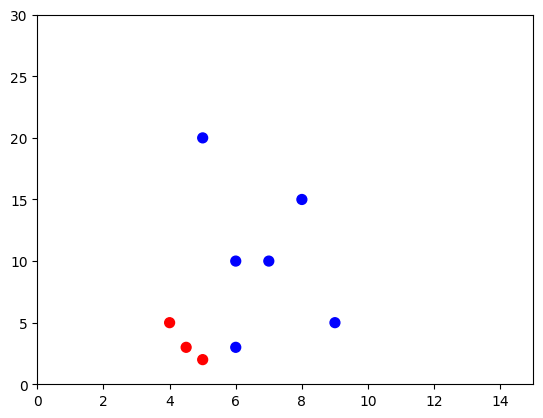

In [212]:
# plot the dataset
# seperating classes using the colors blue and red
# blue : lorry, red : van

class_colors = np.array(['b', 'r'])

# plot the dataset, "Length" is x axis, "Mass" is y axis
plt.ylim([0,30])
plt.xlim([0,15])
length_min_max = plt.xlim()
mass_min_max = plt.ylim()

plt.scatter(df.Length, df.Mass, c=class_colors[df.ClassId], s=50)

In [213]:
# prompt: buatkan contoh looping banyak kode di python

# Looping through the DataFrame and performing operations on each row
for index, row in df.iterrows():
  length = row['Length']
  mass = row['Mass']
  vehicle_class = row['Class']
  class_id = row['ClassId']

  # Example operations:
  # 1. Print the information for each vehicle
  print(f"Vehicle {index + 1}: Length = {length}, Mass = {mass}, Class = {vehicle_class}, ClassId = {class_id}")

  # 2. Calculate the ratio of length to mass for each vehicle
  if mass != 0:
    ratio = length / mass
    print(f"Length to Mass Ratio: {ratio}")

  # 3. Apply a custom function to each row (e.g., categorize vehicles based on length and mass)
  def categorize_vehicle(length, mass):
    if length > 7 and mass > 10:
      return "Large Lorry"
    elif length < 5 and mass < 5:
      return "Small Van"
    else:
      return "Other"

  category = categorize_vehicle(length, mass)
  print(f"Vehicle Category: {category}")

  # Add more code to perform desired operations for each row here

  print("-" * 20)  # Separator for clarity


# Looping through a specific column and applying a function
for length in df['Length']:
  # Example: Calculate the square of each length
  squared_length = length ** 2
  print(f"Length: {length}, Squared Length: {squared_length}")

coefficients = [[ 0.0105 -0.011 ]]
bias = [0.006]


coefficients = [[ 0.0025 -0.01  ]]
bias = [0.01]


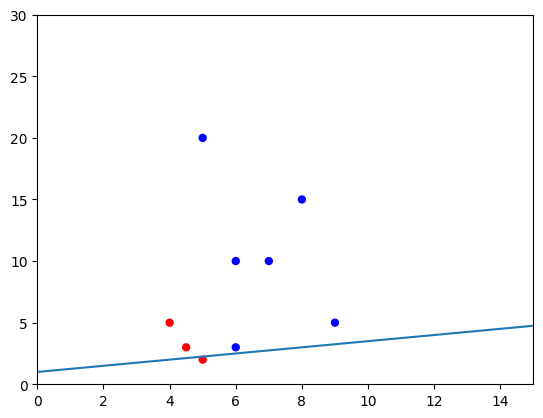

In [250]:
# make perceptron object (m_perceptron)
perceptron = Perceptron(max_iter=216, verbose=0, random_state=None, fit_intercept=True, eta0=0.001)

# train the perceptron object (m_perceptron)
perceptron.fit(df[['Length', 'Mass']],df['ClassId'])

# print the coefficients matrix and bias
coefficients = perceptron.coef_;
bias = perceptron.intercept_;
print ("coefficients = " + str(coefficients))
print ("bias = " + str(bias))

# print the decision boundry
# y = theta0 + theta1 * x1 + theta2 * x2 . . .
# y = bias + coefficients[0][0] * length + coefficients[0][1] * mass
# for plotting the decision boundry equally divide the x axis of the plot

xx1_length = np.linspace(start=length_min_max[0], stop=length_min_max[1], num=100, endpoint=True)

# using the values of the equally divided x axis, calculate the y axis
# using the equation of perceptron (bias and coefficients)
yy = (-bias -(xx1_length * coefficients[0][0])) / coefficients[0][1];

# limit the plot area on x and y axises
plt.ylim([0,30])
plt.xlim([0,15])
# plot the dataset
plt.scatter(df.Length, df.Mass, c=class_colors[df.ClassId], s=25)
# plot the decision boundry
plt.plot(xx1_length,yy)

In [ ]:
# run prediction for all the values in the dataset
prediction = perceptron.predict(df[['Length','Mass']])
print (prediction)

[0 0 0 0 0 0 0 0 0]


In [ ]:
# run prediction for an individual item
# having length 11 and mass 12
prediction = perceptron.predict([[11,12]])
print (prediction)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


In [ ]:
# run prediction for an individual item
# having length 2 and mass 7
prediction = perceptron.predict([[2,7]])
print (prediction)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(
